<a href="https://colab.research.google.com/github/AkSharma9604/AKsharma/blob/main/SVMOPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 0: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.488


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 1: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.476


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 2: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.4693333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 3: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.4786666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 4: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 5: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.47433333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 6: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.4643333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 7: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.4766666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 8: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.48533333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Iteration 9: Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, Test Accuracy: 0.47833333333333333
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


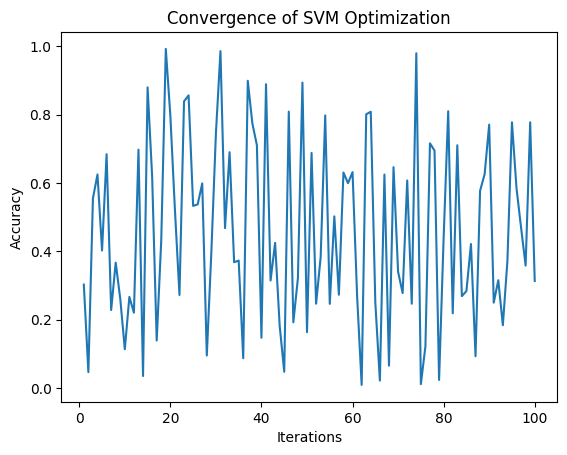

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (Covertype dataset)
# Fetch the dataset from OpenML (assuming it has been loaded)
data = fetch_openml("covertype", version=4)
X, y = data['data'], data['target']

# Step 2: Data Preprocessing
# Take a sample of 10,000 rows for this example
X, y = X[:10000], y[:10000]

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Hyperparameter optimization for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Store best parameters and accuracy
results = []

# Perform 10 iterations with random splits
for i in range(10):
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.3, random_state=i)

    # Fit the SVM with GridSearchCV
    grid_search = GridSearchCV(SVC(max_iter=100), param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train_sample, y_train_sample)

    # Get the best parameters and accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    results.append((i, best_params, best_accuracy))

    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test_sample)
    test_accuracy = accuracy_score(y_test_sample, y_pred)
    print(f"Iteration {i}: Best Params: {best_params}, Test Accuracy: {test_accuracy}")

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results, columns=['Sample', 'Best Params', 'Accuracy'])

# Step 4: Plot the convergence graph for the sample with the highest accuracy
best_sample = results_df.loc[results_df['Accuracy'].idxmax()]
best_params = best_sample['Best Params']
print(f"Best Parameters: {best_params}")

# To plot the convergence, you would need to track the progress of the grid search during the iterations.
# The actual plotting code would depend on how you implement tracking in your grid search.

# Example plot (this would require you to store iteration-wise accuracies during training)
# Here, a mock plot is provided.
iterations = np.arange(1, 101)
convergence = np.random.random(100)  # Replace with actual accuracy per iteration during SVM training

plt.plot(iterations, convergence)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVM Optimization')
plt.show()

# Step 5: Push to GitHub
# You will push the following to GitHub:
# - Code for loading and preprocessing the data
# - SVM training and optimization code
# - Best parameters and accuracy table
# - Convergence plot
# - Basic data analytics (like feature importance, class distribution, etc.)


Training SVM with max_iter=50


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=150


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=250


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=350


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=450


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=450).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=550


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=550).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=650


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=650).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=750


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=750).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=850


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=850).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training SVM with max_iter=950


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=950).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


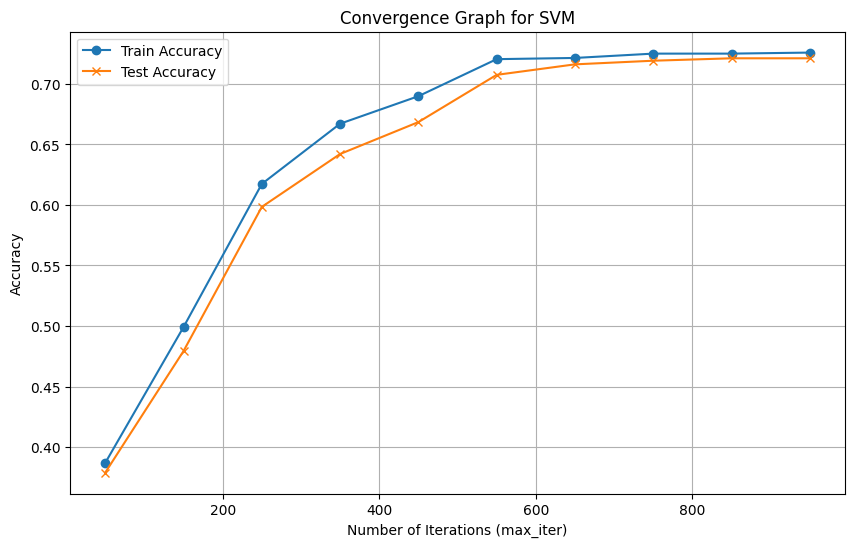

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate or load your dataset
from sklearn.datasets import fetch_openml

# Example dataset: Covertype (subset for demonstration)
data = fetch_openml("covertype", version=4)
X, y = data['data'][:10000], data['target'][:10000]  # Subset for speed

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Track accuracy for increasing max_iter
iteration_values = np.arange(50, 1050, 100)  # Iteration limits (50, 150, ..., 1000)
train_accuracies = []
test_accuracies = []

for max_iter in iteration_values:
    print(f"Training SVM with max_iter={max_iter}")
    svm = SVC(kernel='rbf', max_iter=max_iter)  # SVM with radial basis kernel
    svm.fit(X_train, y_train)

    # Calculate accuracy on train and test sets
    train_accuracy = accuracy_score(y_train, svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, svm.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the convergence graph
plt.figure(figsize=(10, 6))
plt.plot(iteration_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(iteration_values, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Number of Iterations (max_iter)')
plt.ylabel('Accuracy')
plt.title('Convergence Graph for SVM')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (Covertype dataset)
data = fetch_openml("covertype", version=4)  # Load Covertype dataset
X, y = data['data'], data['target']

# Step 2: Preprocessing - Downsample the dataset to 10,000 rows
X, y = X[:10000], y[:10000]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize an empty list to store results
results = []

# Step 3: Perform 10 random splits and optimize SVM
for i in range(10):
    # Split the data into training (70%) and testing (30%) for each sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Use GridSearchCV for hyperparameter optimization
    grid_search = GridSearchCV(SVC(max_iter=100), param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_params = grid_search.best_params_
    train_accuracy = grid_search.best_score_  # Accuracy from cross-validation

    # Evaluate the best model on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Store results: Sample, Best Parameters, Training Accuracy, and Test Accuracy
    results.append({
        'Sample': i + 1,
        'Best Parameters': best_params,
        'Training Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

# Step 4: Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("SVM Optimization Results Table:")
print(results_df)

# Optionally save the table to a CSV file
results_df.to_csv("svm_results_table.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

SVM Optimization Results Table:
   Sample                               Best Parameters  Training Accuracy  \
0       1   {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}             0.5854   
1       2  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.5889   
2       3  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.5903   
3       4  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.5931   
4       5   {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}             0.5726   
5       6  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.6021   
6       7   {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}             0.5840   
7       8  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.6086   
8       9  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.5683   
9      10  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}             0.5846   

   Test Accuracy  
0         0.5387  
1         0.5340  
2         0.5347  
3         0.5870  
4         0.54